In [1]:
import torch
print('CUDA:',torch.version.cuda)

CUDA: None


# 1. Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, 
                            classification_report)

%matplotlib inline

# 2. Load dataset

In [3]:
df = pd.read_csv('dataset.csv')

df.head(30)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1 = pd.read_csv('Symptom-severity.csv')

df1.head(30)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


# 3. Data Exploration & Cleaning

In [5]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [6]:
print(f"Length of dataset: {len(df)}")

print(f"\nNA values in dataset: \n{df.isna().sum()}")

print(f"\nPercentage NA values in dataset: \n{df.isna().sum()/len(df) * 100}")

Length of dataset: 4920

NA values in dataset: 
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

Percentage NA values in dataset: 
Disease        0.000000
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


In [7]:
cols = df.columns
data = df[cols].values.flatten()
print(f"Shape: {data.shape}")
data

Shape: (88560,)


array(['Fungal infection', 'itching', ' skin_rash', ..., nan, nan, nan],
      dtype=object)

In [8]:
series_data = pd.Series(data)
series_data = series_data.str.strip()
series_data = series_data.values.reshape(df.shape)

df = pd.DataFrame(series_data, columns=df.columns)

df = df.fillna(0)
df.head(15)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head(20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


# 4. Classification Models
4.1 Logistic Regression

4.2 Support Vector Machine

4.3 Decision Tree Classifier

4.4 Random Forest Classifier

4.5 K-Nearest Neighbours

4.6 Ensemble Regression

In [12]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(8, 8), dpi=150)
    
    y_pred = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
    
    sns.heatmap(df_cm, annot=True)

In [13]:
def create_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy : {acc*100:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}\n")
    print("Classification report: \n")
    print(report)

### 4.1 Logistic Regression

In [14]:
lr_model = LogisticRegression(solver='saga', max_iter=2500)
lr_model.fit(X_train, y_train)

/Users/abhivesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2500, solver='saga')

In [15]:
create_report(lr_model, X_test, y_test)

Accuracy : 91.8699
Precision: 0.9236
Recall   : 0.9187
F1 Score : 0.9189

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.79      0.83      0.81        23
                                   AIDS       0.81      0.91      0.86        23
                                   Acne       1.00      1.00      1.00        25
                    Alcoholic hepatitis       1.00      0.81      0.89        26
                                Allergy       0.64      0.90      0.75        20
                              Arthritis       0.93      1.00      0.96        25
                       Bronchial Asthma       0.80      0.67      0.73        24
                   Cervical spondylosis       0.64      0.70      0.67        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       0.88      0.88      0.88        26
         

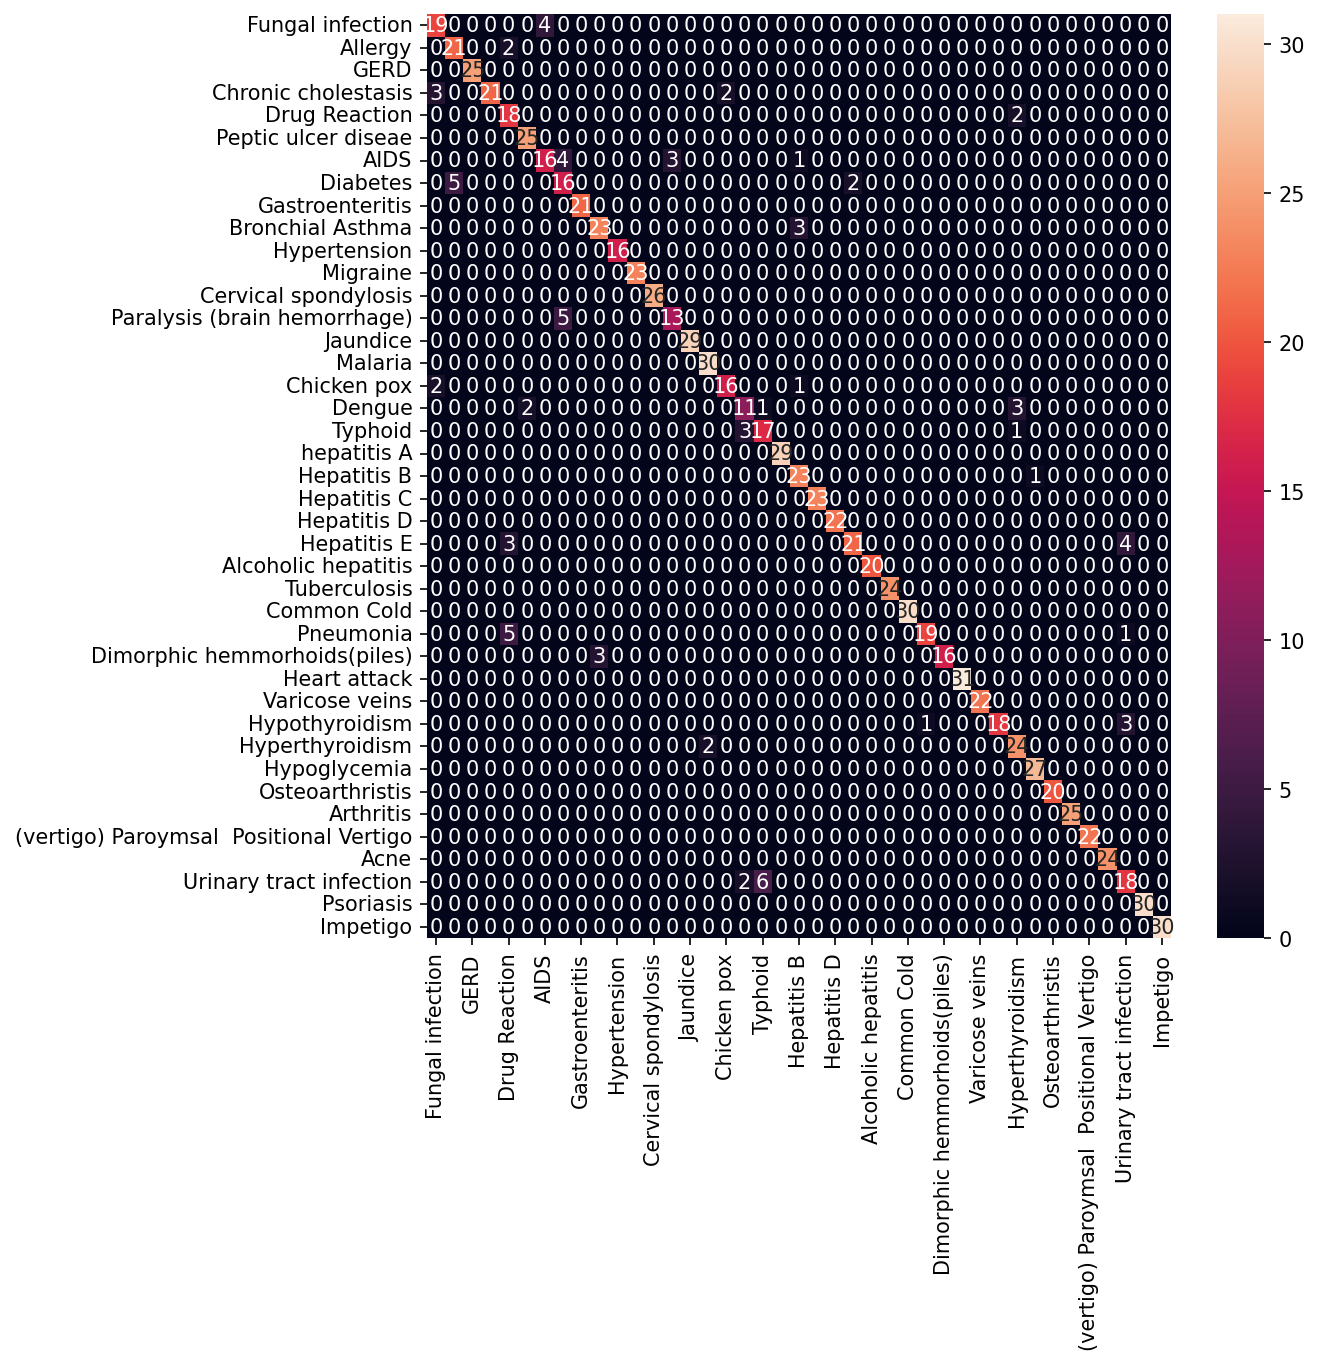

In [16]:
confusion_plot(lr_model, X_test, y_test)

### 4.2 Support Vector Classifier

In [17]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [18]:
create_report(svc_model, X_test, y_test)

Accuracy : 94.0041
Precision: 0.9460
Recall   : 0.9400
F1 Score : 0.9392

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.79      0.83      0.81        23
                                   AIDS       1.00      1.00      1.00        23
                                   Acne       1.00      1.00      1.00        25
                    Alcoholic hepatitis       1.00      0.62      0.76        26
                                Allergy       0.90      0.90      0.90        20
                              Arthritis       0.89      1.00      0.94        25
                       Bronchial Asthma       0.80      0.67      0.73        24
                   Cervical spondylosis       0.72      0.91      0.81        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       0.82      0.88      0.85        26
         

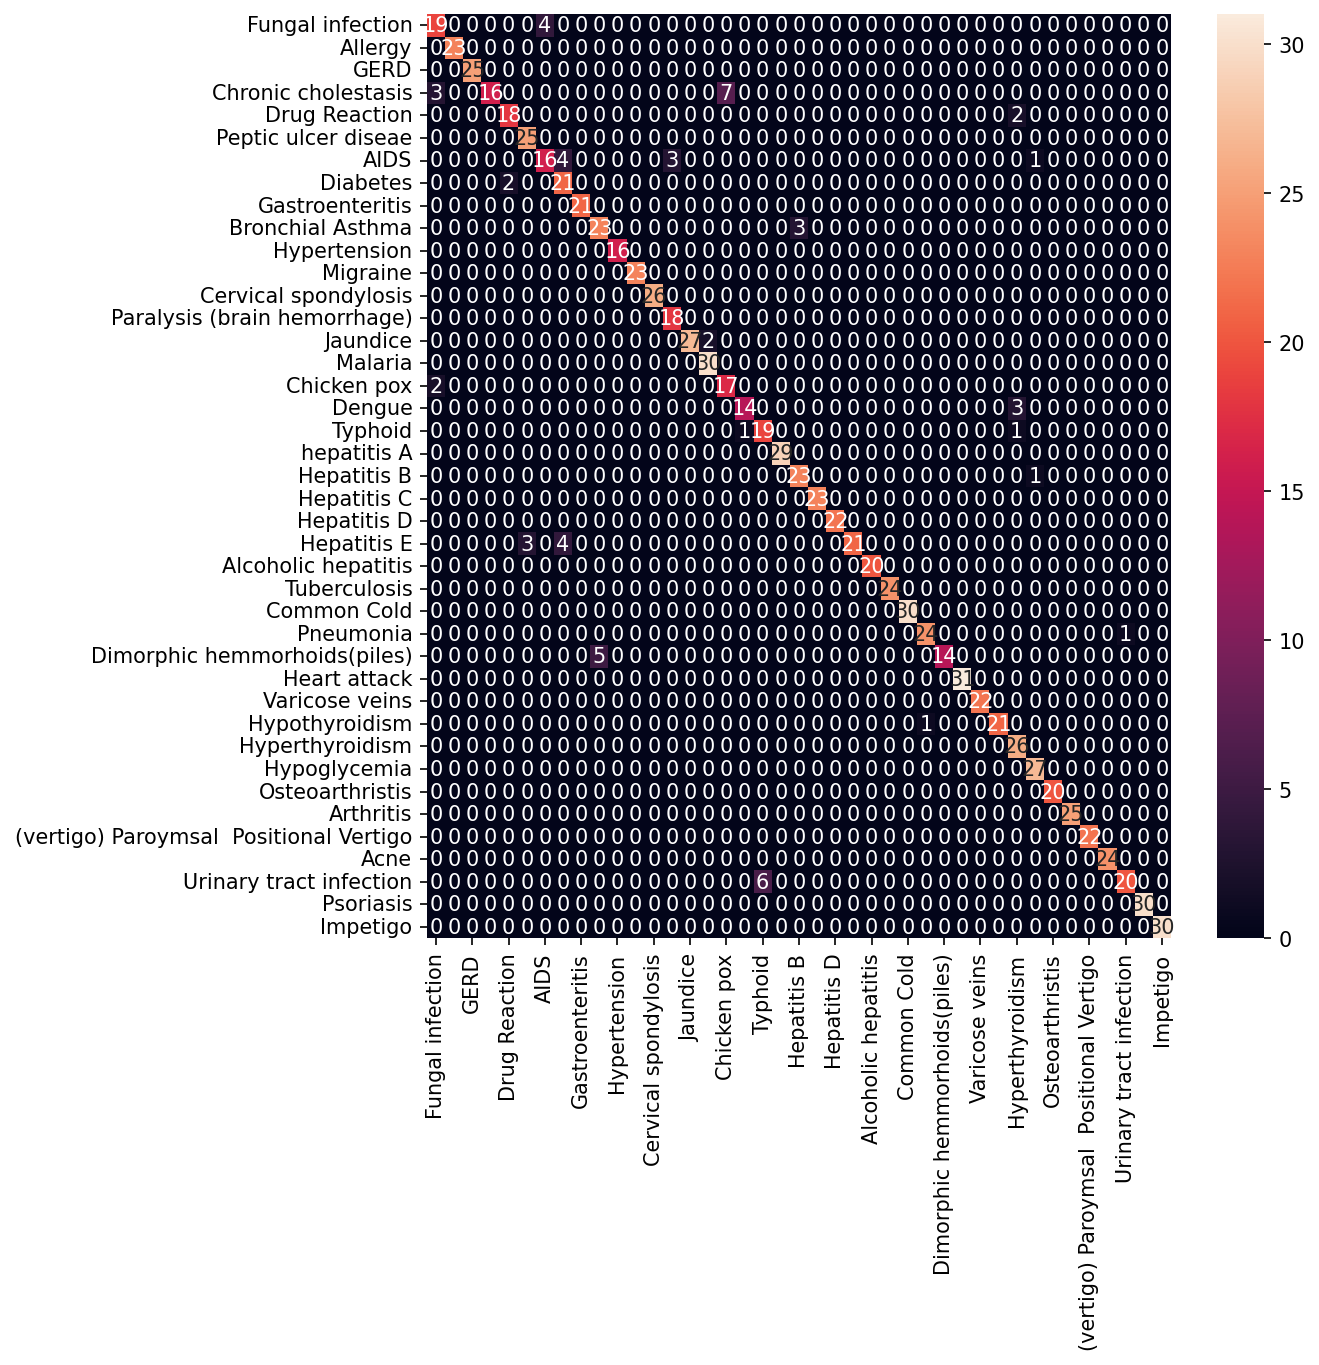

In [19]:
confusion_plot(svc_model, X_test, y_test)

### 4.3 Decision Tree Classifier

In [20]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
create_report(dt_model, X_test, y_test)

Accuracy : 99.3902
Precision: 0.9950
Recall   : 0.9939
F1 Score : 0.9940

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        23
                                   Acne       1.00      1.00      1.00        25
                    Alcoholic hepatitis       1.00      1.00      1.00        26
                                Allergy       0.80      1.00      0.89        20
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       0.96      1.00      0.98        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        26
         

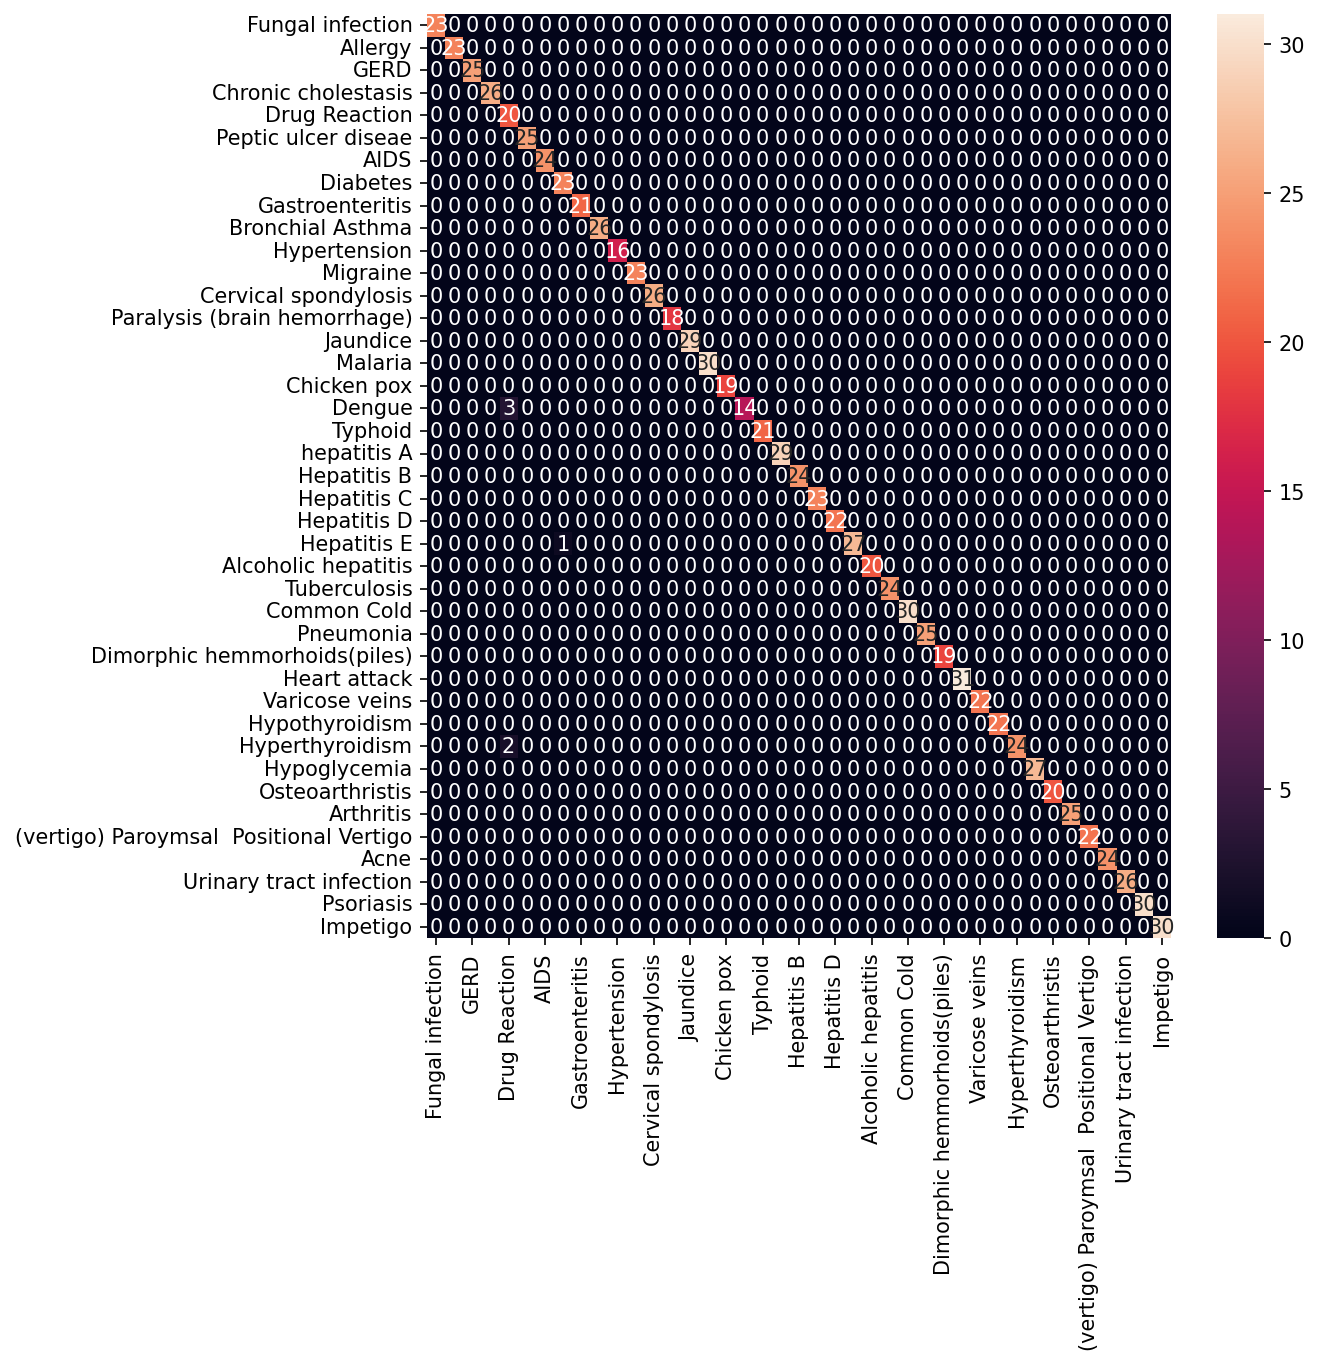

In [22]:
confusion_plot(dt_model, X_test, y_test)

### 4.4 Random Forest Classifier

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
create_report(rf_model, X_test, y_test)

Accuracy : 99.3902
Precision: 0.9950
Recall   : 0.9939
F1 Score : 0.9940

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        23
                                   Acne       1.00      1.00      1.00        25
                    Alcoholic hepatitis       1.00      1.00      1.00        26
                                Allergy       0.80      1.00      0.89        20
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       0.96      1.00      0.98        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        26
         

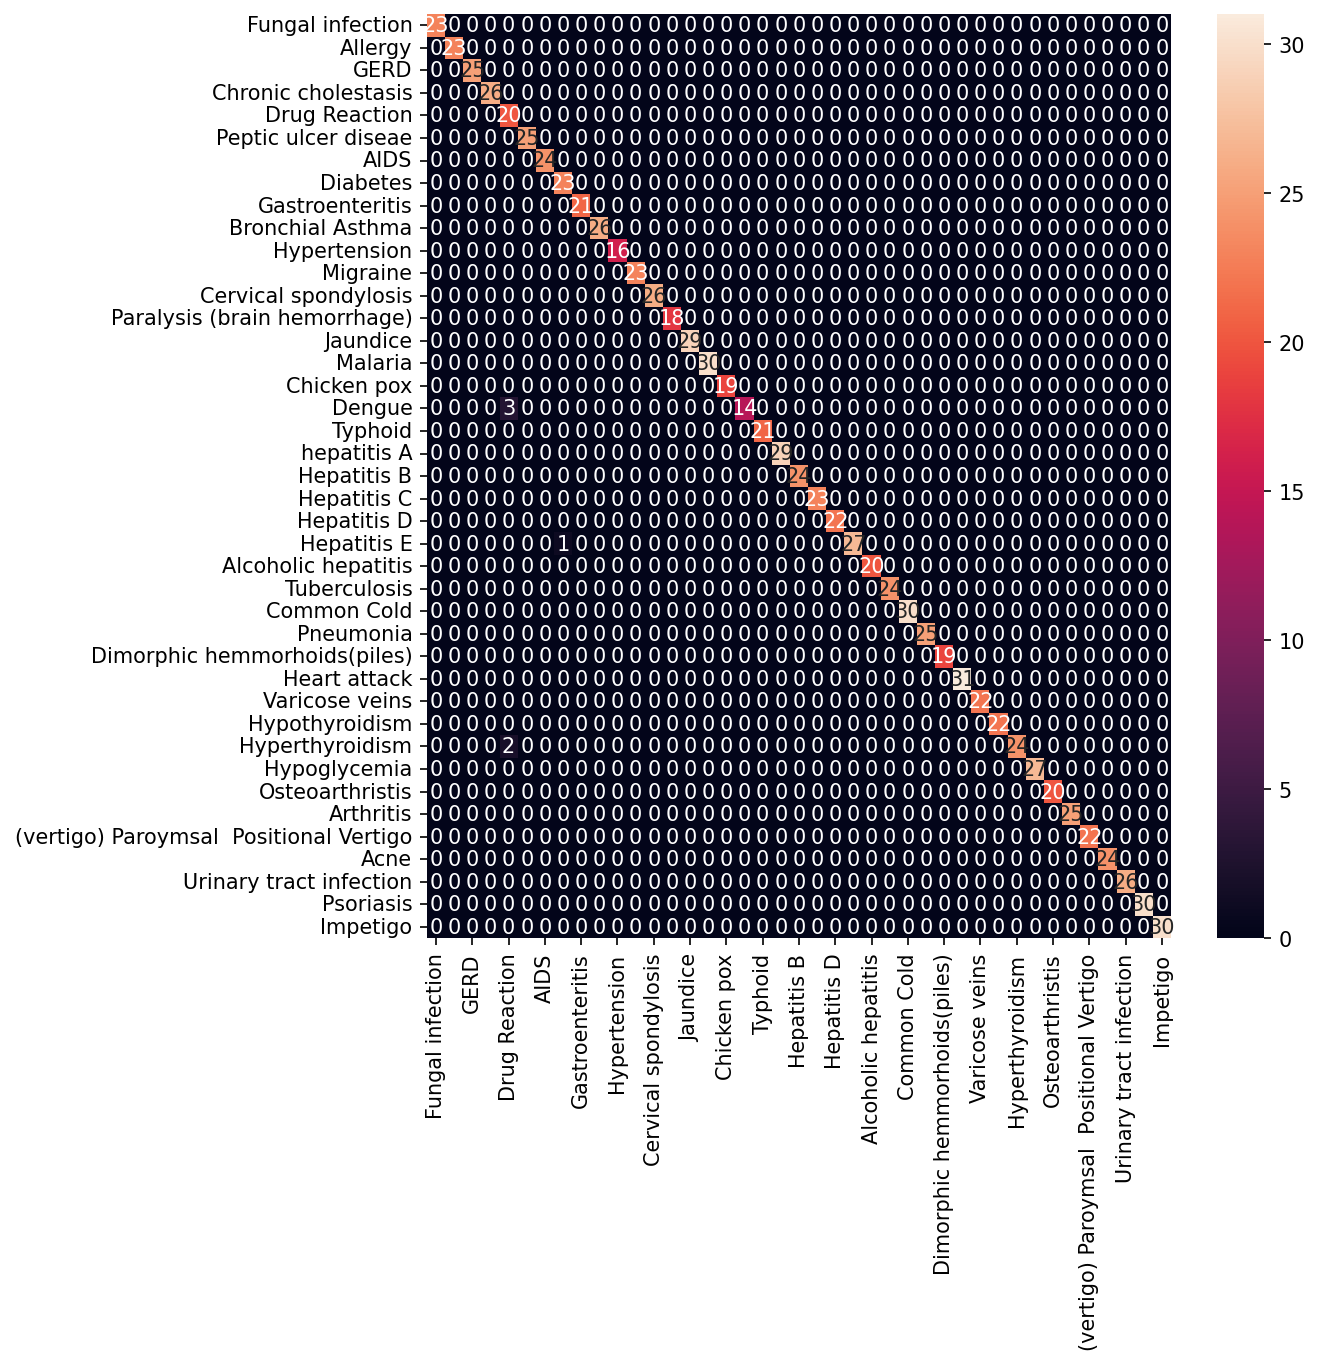

In [25]:
confusion_plot(rf_model, X_test, y_test)

### 4.5 K-Nearest Neighbors

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
create_report(knn_model, X_test, y_test)

Accuracy : 98.8821
Precision: 0.9907
Recall   : 0.9888
F1 Score : 0.9888

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        23
                                   Acne       1.00      1.00      1.00        25
                    Alcoholic hepatitis       1.00      1.00      1.00        26
                                Allergy       0.80      1.00      0.89        20
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       0.96      1.00      0.98        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        26
         

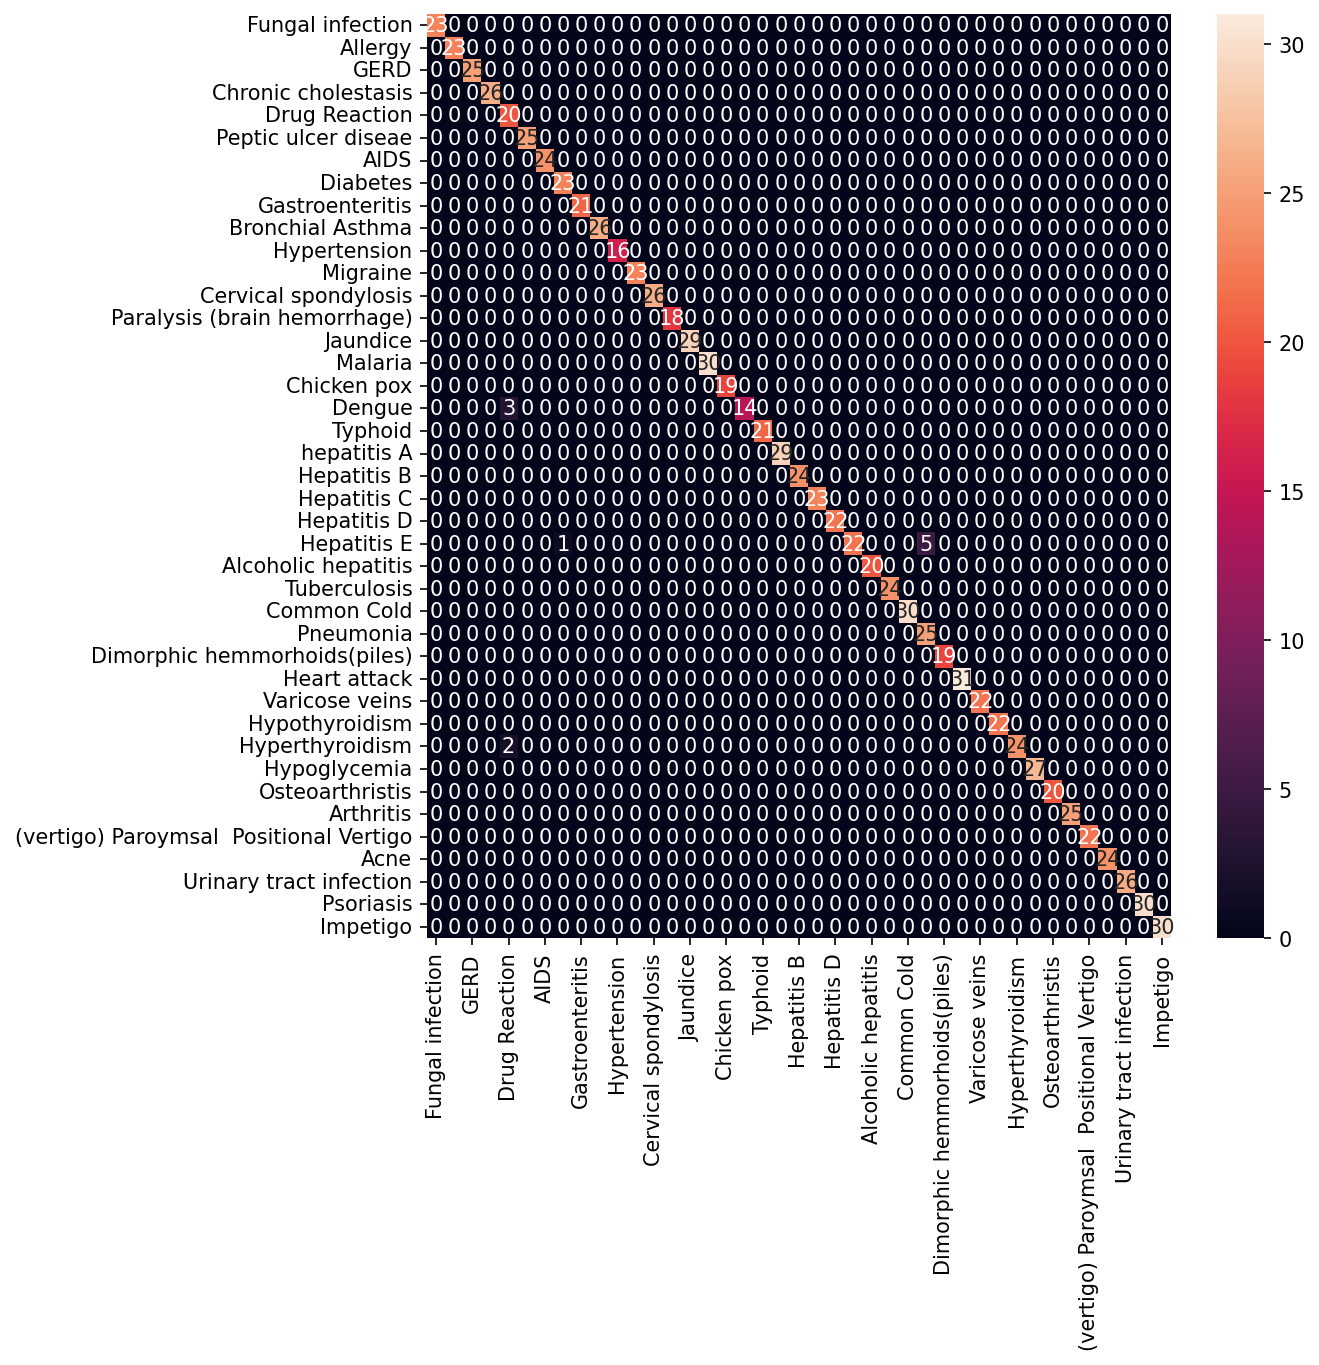

In [28]:
confusion_plot(knn_model, X_test, y_test)

### 4.6 Ensemble Regression

In [29]:
er_model = VotingClassifier(estimators=[('lr_model', lr_model), ('svc_model', svc_model), ('dt_model', dt_model), ('rf_model', rf_model), ('knn_model', knn_model)])
er_model.fit(X_train, y_train)

/Users/abhivesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('lr_model',
                              LogisticRegression(max_iter=2500, solver='saga')),
                             ('svc_model', SVC()),
                             ('dt_model', DecisionTreeClassifier()),
                             ('rf_model', RandomForestClassifier()),
                             ('knn_model', KNeighborsClassifier())])

In [30]:
create_report(er_model, X_test, y_test)

Accuracy : 99.3902
Precision: 0.9950
Recall   : 0.9939
F1 Score : 0.9940

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        23
                                   Acne       1.00      1.00      1.00        25
                    Alcoholic hepatitis       1.00      1.00      1.00        26
                                Allergy       0.80      1.00      0.89        20
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       0.96      1.00      0.98        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        26
         

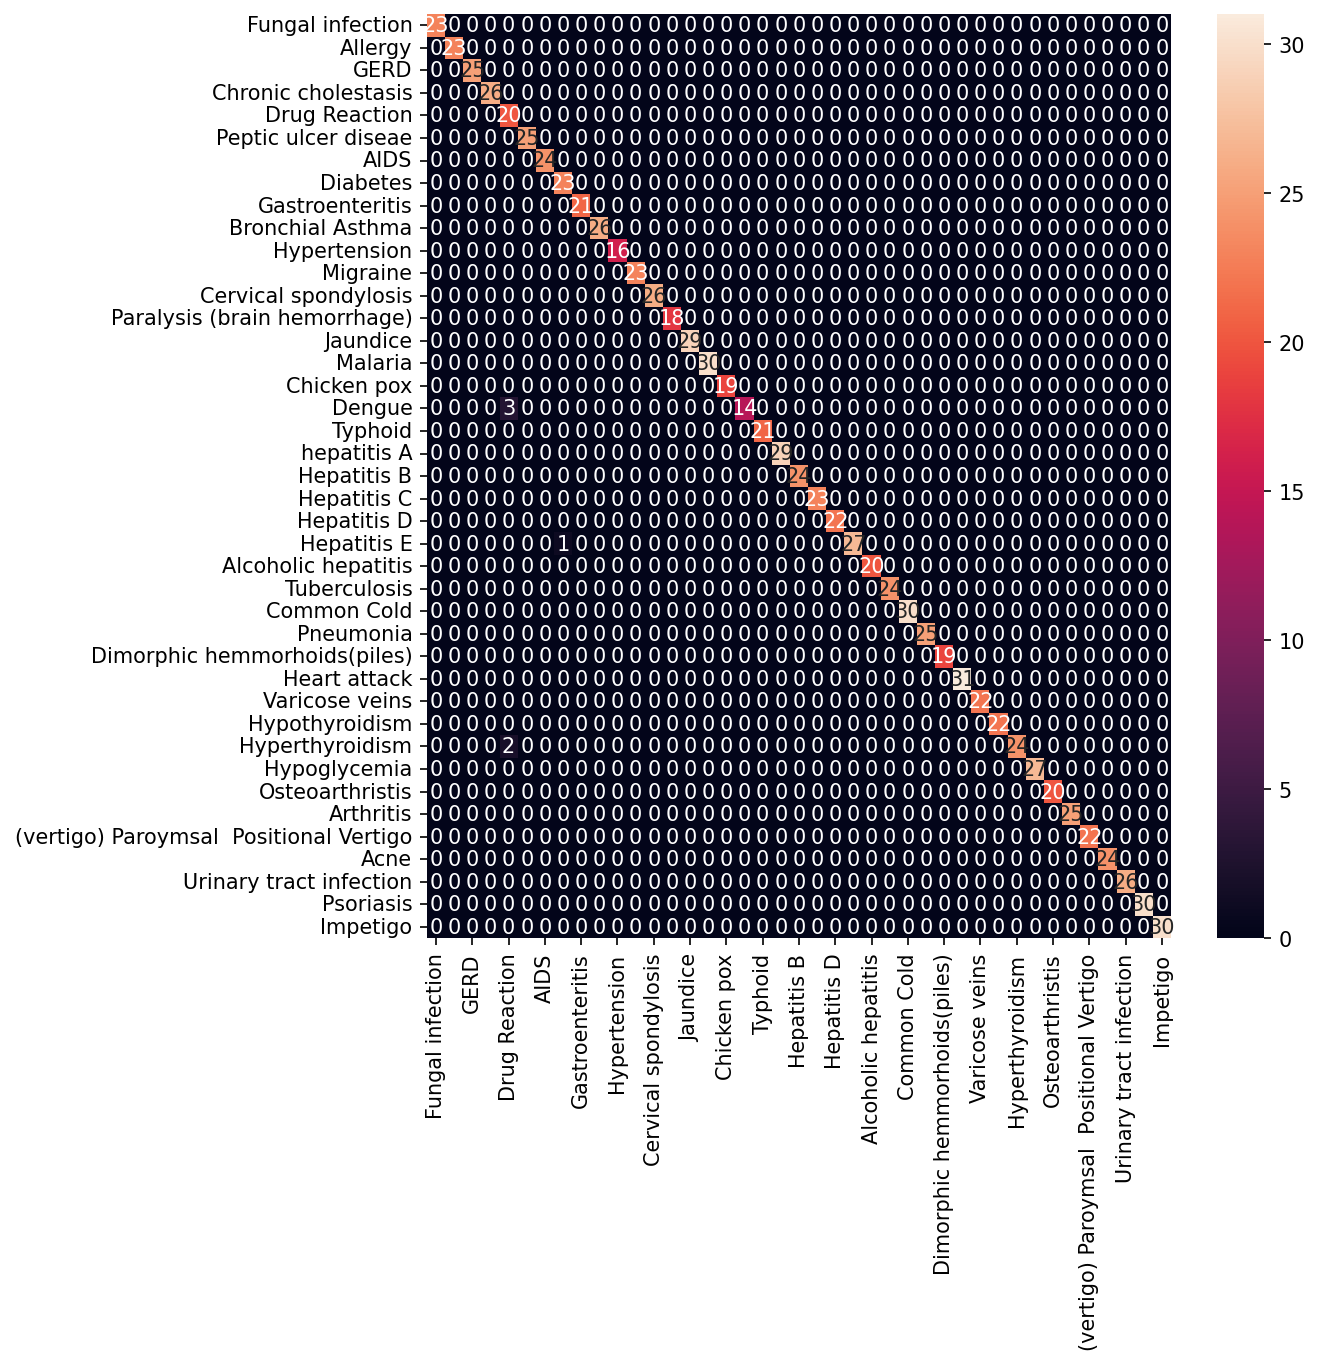

In [31]:
confusion_plot(er_model, X_test, y_test)

# 5. References
* https://www.kaggle.com/code/kunal2350/disease-prediction-and-analytics